## Importing Required Libraries

In [2]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from pathlib import Path
import imghdr

import sys
# Python 3.7 or above needed
assert sys.version_info >= (3, 7)

from packaging import version
import sklearn
# scikit-learn > 1.01
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")



## Data preprocessing and assigning a Path for the Dataset

In [3]:
TRAIN_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train"
TEST_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test"
VALIDATION_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/validation"
BATCH_SIZE=64
IMG_SIZE = (160, 160)

### Control how many categories and images present

In [4]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 5891 in folder Anger
For training data, found 2327 in folder Disgust
For training data, found 6019 in folder Fear
For training data, found 9137 in folder Happiness
For training data, found 4965 in folder neutral
For training data, found 6752 in folder Sadness
For training data, found 5093 in folder Surprise


In [5]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 1195 in folder Anger
For testing data, found 348 in folder Disgust
For testing data, found 1265 in folder Fear
For testing data, found 2015 in folder Happiness
For testing data, found 1233 in folder neutral
For testing data, found 1488 in folder Sadness
For testing data, found 1072 in folder Surprise


In [5]:
for folder in os.listdir(VALIDATION_DIR):
    files = gb.glob(pathname= str(VALIDATION_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 4232 in folder Anger
For testing data, found 672 in folder Disgust
For testing data, found 4337 in folder Fear
For testing data, found 7455 in folder Happiness
For testing data, found 4965 in folder neutral
For testing data, found 4027 in folder Sadness
For testing data, found 3411 in folder Surprise


### Show random images withe their labels

In [6]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

In [7]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise', 'neutral']

Image shape (48, 48)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (416, 416, 3)
Image shape (48, 48)
Image shape (48, 48)
Image shape (416, 416, 3)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)
Image shape (48, 48)


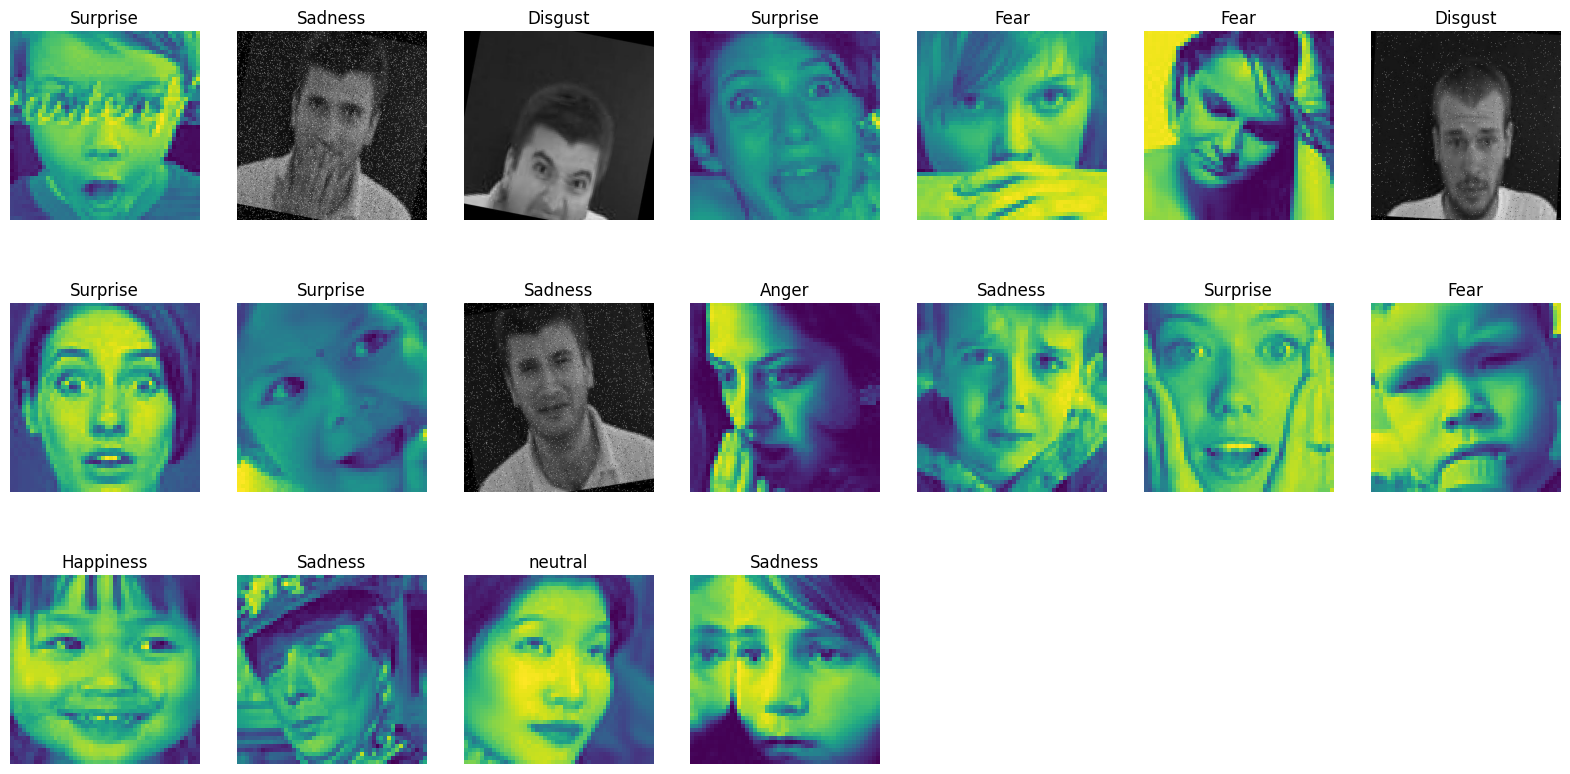

In [8]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = os.path.join(target_dir, target_class)
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # read in the image and plot it using matplotlib
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")
    
    return img

target_dir = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train"

plt.figure(figsize=(20, 10))
for i in range(18):
    plt.subplot(3, 7, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=target_dir, target_class=class_name)

plt.show()



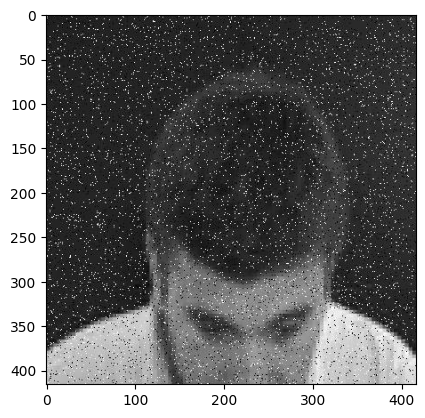

In [9]:
import cv2

img = cv2.imread('C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train/Disgust/myvideo_frames1820_jpg.rf.5573aa189b0fa1c0a3c41f192eb95cbc.jpg')
#BGR
plt.imshow(img)
# colorful
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

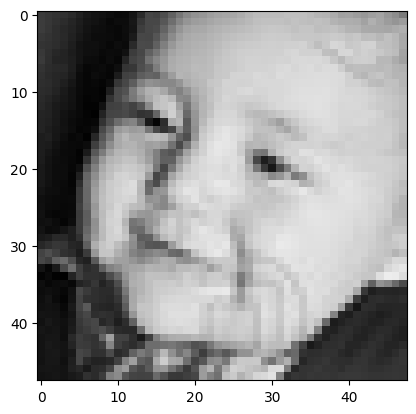

In [10]:
import cv2

img = cv2.imread('C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/validation/neutral/Training_99917717.jpg')

#BGR
plt.imshow(img)
# colorful
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Prepare train, validation and test dataset

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')


validation_dataset = tf.keras.utils.image_dataset_from_directory(VALIDATION_DIR,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 40184 images belonging to 7 classes.
Found 8616 images belonging to 7 classes.
Found 29099 files belonging to 7 classes.


In [12]:
# There might be some files which can't be loaded. Follwoing code can delete those files
# Set 'DELETE_FILES' to True to remove the files

data_dir = 'train/' + 'test/' + 'validation/'

DELETE_FILES = False

image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            if DELETE_FILES:
                os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            if DELETE_FILES:
                os.remove(filepath)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Verzeichnispfad zum Laden der Bilder
image_directory = 'C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train'

# Erstellen des ImageDataGenerator-Objekts
data_generator = ImageDataGenerator(rescale=1./255)

# Laden der Bilder vom Verzeichnispfad
training_set = data_generator.flow_from_directory(
    image_directory,
    target_size=(128, 128),  # Zielformat der Bilder
    batch_size=32,  # Batch-Größe
    class_mode='categorical'  # Klassenmodus (hier: kategorisch)
)

class_names = list(training_set.class_indices.keys())

print('The dataset consists of the following {} classes: {}'.format(len(class_names), class_names))



Found 40184 images belonging to 7 classes.
The dataset consists of the following 7 classes: ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise', 'neutral']


Show the first nine images and labels from the training set:

tf.Tensor([0 6 0 3 2 3 3 5 4], shape=(9,), dtype=int32)
tf.Tensor(1687628828.502314, shape=(), dtype=float64)


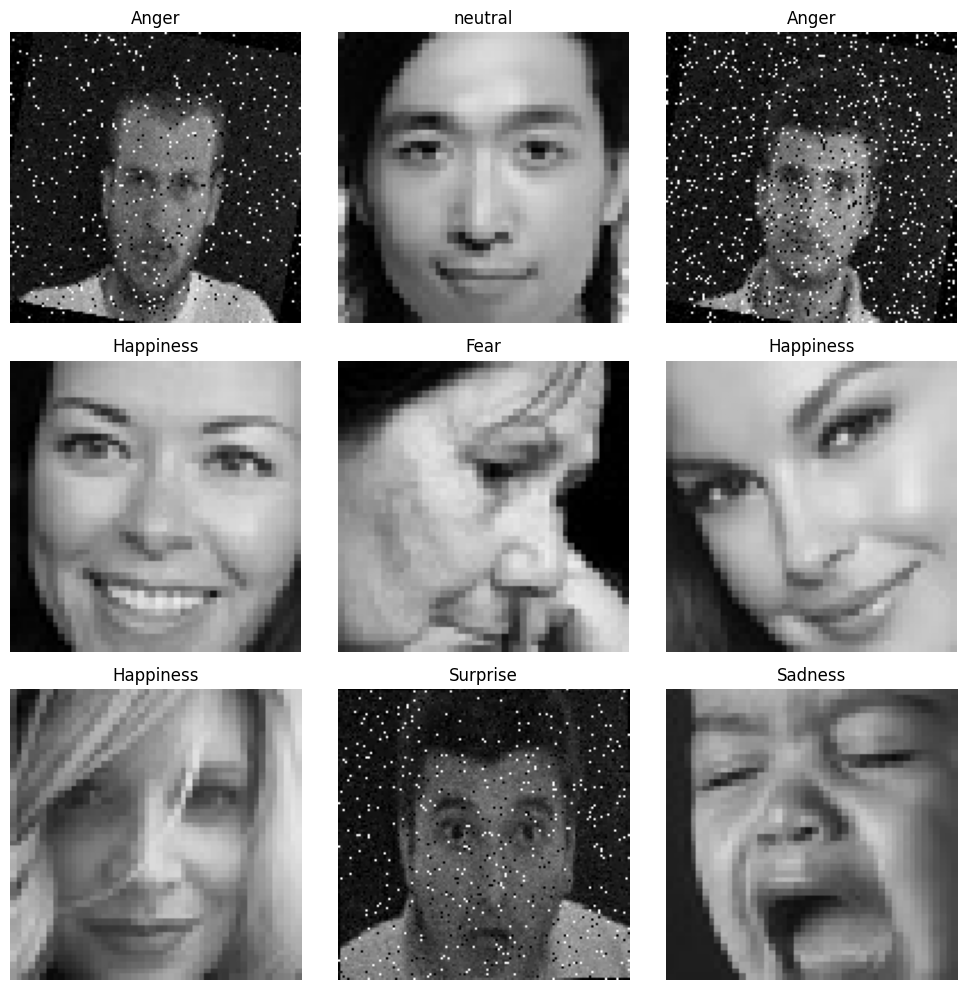

In [14]:
# Auslesen der ersten neun Bilder und Labels
images, labels = next(training_set)
images = images[:9]
labels = labels[:9]

# Umwandeln der Labels in Klassenindizes
class_indices = training_set.class_indices
class_names = list(class_indices.keys())
label_indices = np.argmax(labels, axis=1)
class_labels = [class_names[idx] for idx in label_indices]

# Anzeigen der Labels im gewünschten Format
print(tf.constant(label_indices, dtype=tf.int32))
print(tf.timestamp())

# Anzeigen der Bilder und Labels
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()
for i in range(9):
    axes[i].imshow(images[i])
    axes[i].set_title(class_labels[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Basic model building (CNN Classifier)

In [15]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 7, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Use data augmentation


In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

Found 40184 images belonging to 7 classes.


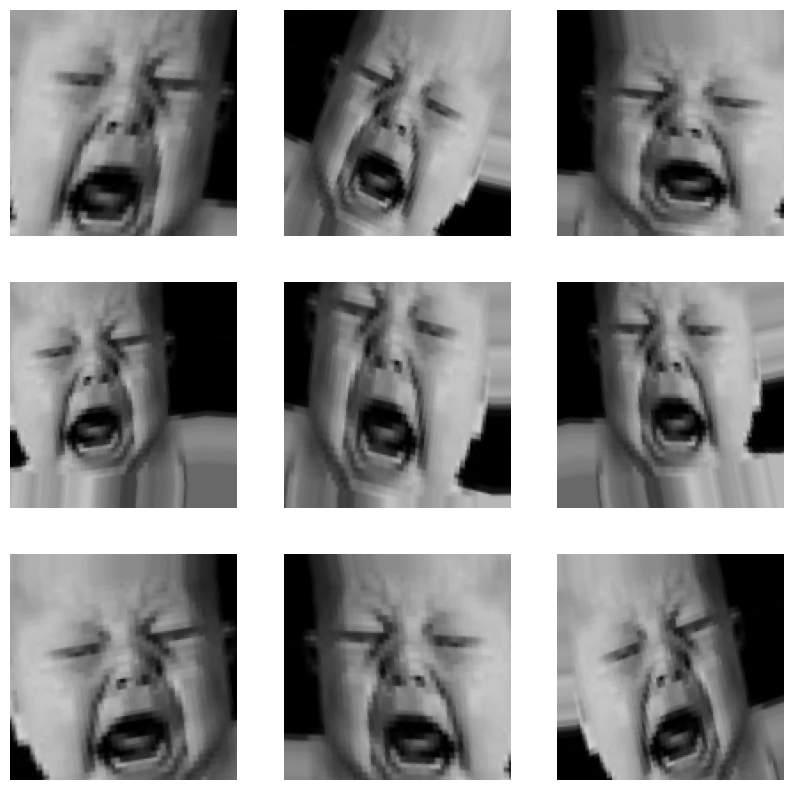

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Verzeichnispfad zum Laden der Bilder
image_directory = 'C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train'

# Erstellen des ImageDataGenerator-Objekts mit Datenaugmentierung
data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # zufällige Rotation zwischen -20° und +20°
    width_shift_range=0.1,  # zufällige Verschiebung in horizontaler Richtung
    height_shift_range=0.1,  # zufällige Verschiebung in vertikaler Richtung
    shear_range=0.2,  # zufällige Scherung
    zoom_range=0.2,  # zufälliges Zoomen
    horizontal_flip=True  # horizontale Spiegelung
)

# Laden der Bilder vom Verzeichnispfad mit Datenaugmentierung
training_set = data_generator.flow_from_directory(
    image_directory,
    target_size=(128, 128),  # Zielformat der Bilder
    batch_size=32,  # Batch-Größe
    class_mode='categorical'  # Klassenmodus (hier: kategorisch)
)

# Retrieving the next batch of images from training_set
image, _ = next(training_set)

plt.figure(figsize=(10, 10))
first_image = image[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_generator.random_transform(first_image)
    plt.imshow(augmented_image)
    plt.axis('off')

plt.show()


In [18]:
#model summary
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 128)               3

### Confusion Matrix

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Modell laden
emotionmodell = tf.keras.models.load_model('C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/emotionmodell.h5')

# Vorhersagen machen
predictions = emotionmodell.predict(test_set)

# Index des Klassenlabels mit der höchsten Wahrscheinlichkeit extrahieren
predicted_labels = np.argmax(predictions, axis=1)

# Wahre Labels aus den Testdaten extrahieren
true_labels = test_set.classes

# Klassenbezeichnungen extrahieren
class_names = list(test_set.class_indices.keys())

# Confusion Matrix erstellen
cm = confusion_matrix(true_labels, predicted_labels)

# Ausgabe der Confusion Matrix
print(cm)


135/135 [==============================] - 160s 1s/step
[[227  14 120 333 161 177 163]
 [ 63   3  28 102  46  57  49]
 [226  10 118 369 164 187 191]
 [376  17 184 613 281 279 265]
 [302  12 140 439 198 199 198]
 [229   8  94 297 134 161 149]
 [244   5 125 374 155 168 162]]


#### Output:
Der Output "62/135 [============>.................] - ETA: 2:36" ist ein Fortschrittsindikator, der anzeigt, wie viele Testdatenpunkte bereits verarbeitet wurden.

In diesem Fall bedeutet es, dass bisher 62 von insgesamt 135 Testdatenpunkten verarbeitet wurden. Die Darstellung "[============>.................]" zeigt den Fortschritt an, wobei jeder "=" ein verarbeiteter Datenpunkt repräsentiert. Die Auslassungspunkte zeigen, dass noch weitere Datenpunkte verarbeitet werden müssen.

Der Teil "- ETA: 2:36" gibt eine Schätzung für die geschätzte verbleibende Zeit (Estimated Time of Arrival) an, bis alle Testdatenpunkte verarbeitet sind. In diesem Fall beträgt die geschätzte verbleibende Zeit noch 2 Minuten und 36 Sekunden.

Dieser Fortschrittsindikator wird häufig verwendet, um den Fortschritt während des Trainings oder der Vorhersage auf großen Datensätzen anzuzeigen. Sobald der Indikator vollständig ist (z. B. "135/135"), ist die Verarbeitung abgeschlossen.

Neu :
135/135 [==============================] - 160s 1s/step

### Precision and Recall

In [21]:
from sklearn.metrics import precision_score, recall_score

# Vorhersagen machen
predictions = emotionmodell.predict(test_set)
predicted_labels = np.argmax(predictions, axis=1)

# Wahre Labels aus den Testdaten extrahieren
true_labels = test_set.classes

# Genauigkeit berechnen
precision = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision)

# Rückruf berechnen
recall = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall)


135/135 [==============================] - 64s 475ms/step
Precision: 0.1584115305433892
Recall: 0.1674791086350975


# Train my own model (model1.h5)

In [22]:
history = classifier.fit(training_set,
                         epochs = 10, #später mehr als 50 epochs?
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/10
1256/1256 [==============================] - 1038s 826ms/step - loss: 1.7996 - accuracy: 0.2443 - val_loss: 1.6971 - val_accuracy: 0.3196
Epoch 2/10
1256/1256 [==============================] - 644s 513ms/step - loss: 1.7140 - accuracy: 0.2987 - val_loss: 1.6036 - val_accuracy: 0.3711
Epoch 3/10
1256/1256 [==============================] - 425s 338ms/step - loss: 1.6583 - accuracy: 0.3325 - val_loss: 1.5662 - val_accuracy: 0.3908
Epoch 4/10
1256/1256 [==============================] - 404s 322ms/step - loss: 1.6188 - accuracy: 0.3558 - val_loss: 1.5286 - val_accuracy: 0.4089
Epoch 5/10
1256/1256 [==============================] - 411s 327ms/step - loss: 1.5865 - accuracy: 0.3723 - val_loss: 1.4959 - val_accuracy: 0.4181
Epoch 6/10
1256/1256 [==============================] - 439s 349ms/step - loss: 1.5613 - accuracy: 0.3831 - val_loss: 1.5101 - val_accuracy: 0.4168
Epoch 7/10
1256/1256 [==============================] - 432s 344ms/step - loss: 1.5356 - accuracy: 0.3961 - val

### Evaluating the model

In [23]:
classifier.evaluate(test_set)

135/135 [==============================] - 21s 153ms/step - loss: 1.4373 - accuracy: 0.4337


[1.4372700452804565, 0.4337279498577118]

Text(0, 0.5, 'Loss')

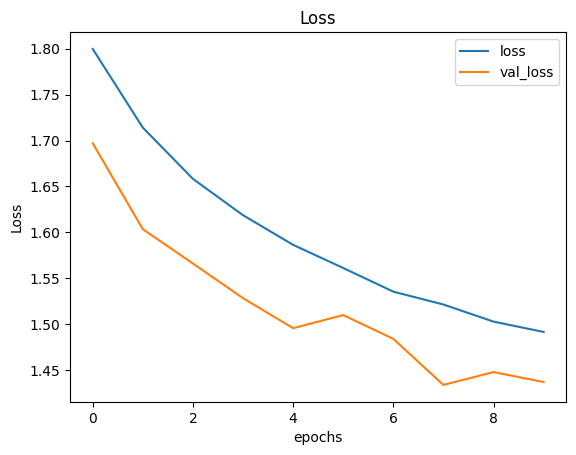

In [24]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

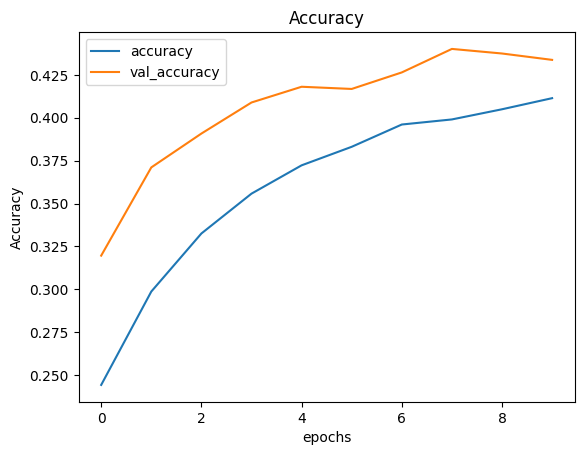

In [25]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [26]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

image_path = r"C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test/Disgust/"
image_filename = "myvideo_frames0_jpg.rf.0bc0c41aed72fe013a0352f04e3a298d.jpg"

image = cv2.imread(image_path + image_filename)


if image is not None:
    # Bild wird in Array konvertiert
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((128, 128))
    expand_input = np.expand_dims(resize_image, axis=0)
    input_data = np.array(expand_input)
    input_data = input_data / 255

    pred = loaded_model.predict(input_data)
    result = pred.argmax()
    print(result)
else:
    print("Fehler beim Laden des Bildes.")


1/1 [==============================] - 0s 76ms/step
4


In [27]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5,
 'neutral': 6}

# MobileNetV3 (as base model)

In a moment, you will download `tf.keras.applications.MobileNetV3` for use as your base model. This model expects pixel values in `[-1, 1]`, but at this point, the pixel values in your images are in `[0, 255]`. To rescale them, use the preprocessing method included with the model.<br>

As stated before, information about the applications can be found under: https://keras.io/api/applications/ or here https://www.tensorflow.org/api_docs/python/tf/keras/applications 

Each application (model) has the following funcitons:
- decode_predictions(...): Decodes the prediction of an ImageNet model.
- preprocess_input(...): Preprocesses a tensor or Numpy array encoding a batch of images.

In [28]:
from keras.preprocessing.image import ImageDataGenerator

# Verzeichnispfade
TRAIN_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train"
TEST_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test"
VALIDATION_DIR = "C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/validation"

# ImageDataGenerator für das Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# ImageDataGenerator für den Test
test_datagen = ImageDataGenerator(rescale=1./255)

# Trainingsdaten-Generator
training_set = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Testdaten-Generator
test_set = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 40184 images belonging to 7 classes.
Found 8616 images belonging to 7 classes.


In [29]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

# example
preprocess_input(np.asarray([0, 255]))

array([-1.,  1.], dtype=float32)

Note: Alternatively, you could rescale pixel values from `[0, 255]` to `[-1, 1]` using `tf.keras.layers.Rescaling`. <br>
It is recommended to use preprocess_input, because when you change an other base application, you don't have to change the scaling ratio.

In [30]:
import tensorflow
from tensorflow.keras.applications import mobilenet_v3

# Preprocessing
preprocess_input = mobilenet_v3.preprocess_input

# Beispiel
input_data = np.asarray([0, 255])
preprocessed_data = preprocess_input(input_data)

Note: If using other `tf.keras.applications`, be sure to check the API doc to determine if they expect pixels in `[-1, 1]` or `[0, 1]`, or use the included `preprocess_input` function.

### Create the base model from the pre-trained convents
You will create the base model from the **MobileNet V2** model developed at Google. This is pre-trained on the ImageNet dataset, a large dataset consisting of 1.4M images and 1000 classes. ImageNet is a research training dataset with a wide variety of categories like `jackfruit` and `syringe`. This base of knowledge will help us classify cats and dogs from our specific dataset.

First, you need to pick which layer of MobileNet V2 you will use for feature extraction. The very last classification layer (on "top", as most diagrams of machine learning models go from bottom to top) is not very useful. Instead, you will follow the common practice to depend on the very last layer before the flatten operation. This layer is called the "bottleneck layer". The bottleneck layer features retain more generality as compared to the final/top layer.

First, instantiate a MobileNet V2 model pre-loaded with weights trained on ImageNet. By specifying the **include_top=False** argument, you load a network that doesn't include the classification layers at the top, which is ideal for feature extraction.

In [31]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               
                                               # include_top=False :Removes the fully connected layers for predictions 
                                               include_top=False,

                                               # weights from the imagenet challenge.
                                               weights='imagenet')

This feature extractor converts each `160x160x3` image into a `5x5x1280` block of features. Let's see what it does to an example batch of images:

In [32]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Beispielbild laden und skalieren
example_image = load_img('C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train/Disgust/myvideo_frames0_jpg.rf.0c296f01fe55519ca74b259cda98686e.jpg', target_size=(160, 160))
example_image_array = img_to_array(example_image)
example_image_array = preprocess_input(example_image_array)

# Beispielbild in einen Batch umwandeln
example_batch = np.expand_dims(example_image_array, axis=0)

# Eingaben an das Modell übergeben
feature_batch = base_model.predict(example_batch)
print(feature_batch.shape)


1/1 [==============================] - 1s 671ms/step
(1, 5, 5, 1280)


If you load the `MobileNetV2` with `include_top=True` you can predict an image as shown in the following cell.

In [33]:
IMG_SIZE

(160, 160)

Found 40184 images belonging to 7 classes.
1/1 [==============================] - 1s 842ms/step
904
[[('n04589890', 'window_screen', 0.90009123), ('n04209239', 'shower_curtain', 0.016375082), ('n03598930', 'jigsaw_puzzle', 0.009652357), ('n03485794', 'handkerchief', 0.006623625), ('n04332243', 'strainer', 0.005550224)]]


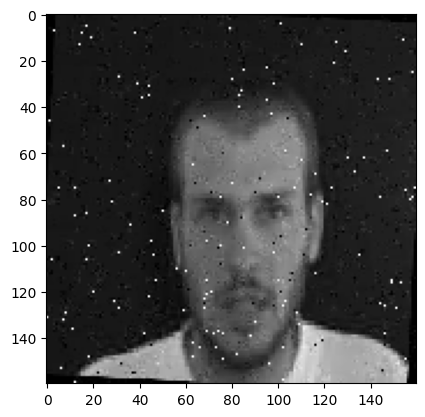

In [34]:
# Verzeichnispfad zum Laden der Bilder
image_directory = 'C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train'

# Erstellen des ImageDataGenerator-Objekts
data_generator = ImageDataGenerator(rescale=1./255)

# Laden der Bilder vom Verzeichnispfad
training_set = data_generator.flow_from_directory(
    image_directory,
    target_size=(128, 128),  # Zielformat der Bilder
    batch_size=32,  # Batch-Größe
    class_mode='sparse'  # Verwenden Sie 'sparse' für Ganzzahl-Labels
)


singel_tmp_image = tf.keras.utils.load_img('C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/train/Disgust/myvideo_frames0_jpg.rf.0c296f01fe55519ca74b259cda98686e.jpg',
                                            target_size=IMG_SIZE,
                                            interpolation="nearest")

model_tmp = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               
                                               # include_top=False :Removes the fully connected layers for predictions 
                                               include_top=True,

                                               # weights from the imagenet challenge.
                                               weights='imagenet')


input_image = np.reshape(np.asarray(singel_tmp_image), ((1,) + IMG_SIZE + (3,)))
predictions = model_tmp.predict(input_image)
print(np.argmax(predictions))
print(tf.keras.applications.mobilenet_v2.decode_predictions(predictions))

plt.imshow(singel_tmp_image)

### Feature extraction
In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.
### Freeze the convolutional base
It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. MobileNet V2 has many layers, so setting the entire model's `trainable` flag to False will freeze all of them.

In [35]:
base_model.trainable = False

### Important note about BatchNormalization layers

Many models contain `tf.keras.layers.BatchNormalization` layers. This layer is a special case and precautions should be taken in the context of fine-tuning, as shown later in this tutorial. 

When you set `layer.trainable = False`, the `BatchNormalization` layer will run in inference mode, and will not update its mean and variance statistics. 

When you unfreeze a model that contains BatchNormalization layers in order to do fine-tuning, you should keep the BatchNormalization layers in inference mode by passing `training = False` when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

For more details, see the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).

You should be able to see, that there are no trainable params:

In [36]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

### Add a classification head
To generate predictions from the block of features, average over the spatial `5x5` spatial locations, using a `tf.keras.layers.GlobalAveragePooling2D` layer to convert the features to  a single 1280-element vector per image.

In [37]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(1, 1280)


Note: If you use flatten then the output layer has a lot more neurons as seen in the following example, the output has 32000 neurons instead of 1280

In [38]:
flatten_layer = tf.keras.layers.Flatten()
flatten_output = flatten_layer(feature_batch)
print(flatten_output.shape)

(1, 32000)


Apply a `tf.keras.layers.Dense` layer to convert these features into a single prediction per image. You don't need an activation function here because this prediction will be treated as a `logit`, or a raw prediction value. Positive numbers predict class 1, negative numbers predict class 0.

In [39]:
number_of_classes = 7  # Anzahl der Klassen im  Datensatz

# number_of_classes is a 
prediction_layer = tf.keras.layers.Dense(number_of_classes, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(1, 7)


Build a model by chaining together the data augmentation, rescaling, `base_model` and feature extractor layers using the [Keras Functional API](https://www.tensorflow.org/guide/keras/functional). As previously mentioned, use `training=False` as our model contains a `BatchNormalization` layer.

In [40]:
def data_augmentation(inputs):
    # Füge hier deine Datenaugmentationslogik ein
    augmented_inputs = tf.image.random_flip_left_right(inputs)
    augmented_inputs = tf.image.random_flip_up_down(augmented_inputs)
    return augmented_inputs


inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

### Compile the model

Compile the model before training it. Since there are two classes, use the `tf.keras.losses.SparseCategoricalCrossentropy`.

In [41]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.image.random_flip_left_r  (None, 160, 160, 3)      0         
 ight (TFOpLambda)                                               
                                                                 
 tf.image.random_flip_up_dow  (None, 160, 160, 3)      0         
 n (TFOpLambda)                                                  
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                    

The 2.5 million parameters in MobileNet are frozen, but there are 7.6 thousand _trainable_ parameters in the Dense layer. These are divided between two `tf.Variable` objects, the weights and biases.

In [43]:
len(model.trainable_variables)

2

### Train the model

After training for 10 epochs, you should see ~94% accuracy on the validation set.

In [44]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

455/455 [==============================] - 558s 1s/step - loss: 2.4347 - accuracy: 0.0819


In [45]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.43
initial accuracy: 0.08


In [46]:
history = model.fit(training_set,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
1256/1256 [==============================] - 777s 617ms/step - loss: 1.9781 - accuracy: 0.2454 - val_loss: 2.4048 - val_accuracy: 0.1344
Epoch 2/10
1256/1256 [==============================] - 1430s 1s/step - loss: 1.7707 - accuracy: 0.3090 - val_loss: 2.4554 - val_accuracy: 0.1436
Epoch 3/10
1256/1256 [==============================] - 2287s 2s/step - loss: 1.7008 - accuracy: 0.3350 - val_loss: 2.4405 - val_accuracy: 0.1507
Epoch 4/10
1256/1256 [==============================] - 1625s 1s/step - loss: 1.6599 - accuracy: 0.3515 - val_loss: 2.4866 - val_accuracy: 0.1578
Epoch 5/10
1256/1256 [==============================] - 1596s 1s/step - loss: 1.6253 - accuracy: 0.3620 - val_loss: 2.4760 - val_accuracy: 0.1885
Epoch 6/10
1256/1256 [==============================] - 1648s 1s/step - loss: 1.6066 - accuracy: 0.3713 - val_loss: 2.4807 - val_accuracy: 0.1969
Epoch 7/10
1256/1256 [==============================] - 1200s 955ms/step - loss: 1.5885 - accuracy: 0.3769 - val_loss: 2.4

In [47]:
#Saving a Keras model:
model.save('hfmodel_versuch_zwei/mobilenetv3-imagenet')

INFO:tensorflow:Assets written to: hfmodel_versuch_zwei/mobilenetv3-imagenet\assets


INFO:tensorflow:Assets written to: hfmodel_versuch_zwei/mobilenetv3-imagenet\assets


### Learning curves

Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

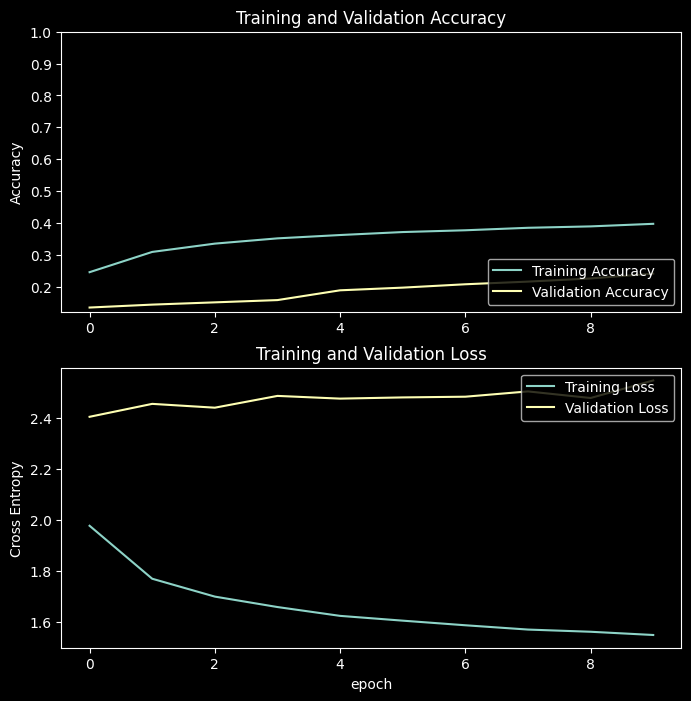

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.style.use('dark_background')

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Fine tuning

In [49]:
# unfreeze the base_modell and set the bottom layers to be un-trainable
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [51]:
model.summary()
len(model.trainable_variables)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.image.random_flip_left_r  (None, 160, 160, 3)      0         
 ight (TFOpLambda)                                               
                                                                 
 tf.image.random_flip_up_dow  (None, 160, 160, 3)      0         
 n (TFOpLambda)                                                  
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                    

56

### Continue training the model

In [65]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(training_set,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/15
1256/1256 [==============================] - 1315s 1s/step - loss: 1.4982 - accuracy: 0.4134 - val_loss: 2.1738 - val_accuracy: 0.2470
Epoch 11/15
1256/1256 [==============================] - 1734s 1s/step - loss: 1.3999 - accuracy: 0.4554 - val_loss: 2.1723 - val_accuracy: 0.2644
Epoch 12/15
 443/1256 [=========>....................] - ETA: 7:25 - loss: 1.3656 - accuracy: 0.4708

In [ ]:
#Saving a Keras model (backup):
model.save('hfmodel_versuch_zwei/mobilenetv3-imagenet')

In [ ]:
# take a look at the accuracy, it should be more on the validation set
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
#plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

### Evaluation and prediction

Finally you can verify the performance of the model on new data using test set.

In [53]:
# Pfad zum Verzeichnis mit den Testbildern
test_directory = 'C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test'

# Laden und Vorbereiten des Testdatensatzes
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    image_size= IMG_SIZE,
    batch_size= BATCH_SIZE
)

# Auswerten der Leistung auf dem Testdatensatz => gibt Informationen darüber, wie gut das Modell mit unbekannten Daten funktioniert
loss, accuracy = model.evaluate(test_set)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Found 8616 files belonging to 7 classes.
135/135 [==============================] - 188s 1s/step - loss: 2.4285 - accuracy: 0.2261
Test Loss: 2.4284982681274414
Test Accuracy: 0.22609099745750427


And now you are all set to use this model to predict if your pet is a cat or dog.

In [54]:
batch_size = 32  # Setzen Sie hier den gewünschten Batch-Größe-Wert

# Auf gewünschte Grösse skalieren

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Laden und Skalieren des Testbildes
test_image = load_img('C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test/Anger/myvideo_frames1600_jpg.rf.ace9ea49cdcfa8fd7f4628e7875f503b.jpg', target_size=(160, 160))
test_image_array = img_to_array(test_image)
test_image_array = test_image_array / 255.0  # optional: Normalisierung auf den Wertebereich [0, 1]

# Umwandeln des Bildes in einen Batch
test_batch = np.expand_dims(test_image_array, axis=0)

# Vorhersage für das Testbild
predictions = model.predict(test_batch)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, rescale=1./255)
test_set = test_datagen.flow_from_directory(
    'C:/Users/janin/Documents/ZHAW_semester4/KI-Anwendungen/Abschlusspruefung/Frontend_Backend_Image_Classification/KI-Anwendungen-n-to-n-backend-mnist-classification/test',
    target_size=(160, 160),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

1/1 [==============================] - 2s 2s/step
Found 8616 images belonging to 7 classes.


Predictions:
 [3 4 4 4 4 4 4 4 2 4 4 2 2 4 4 2 6 2 5 4 0 2 6 0 2 6 3 6 4 2 4 4]
Labels:
 [[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


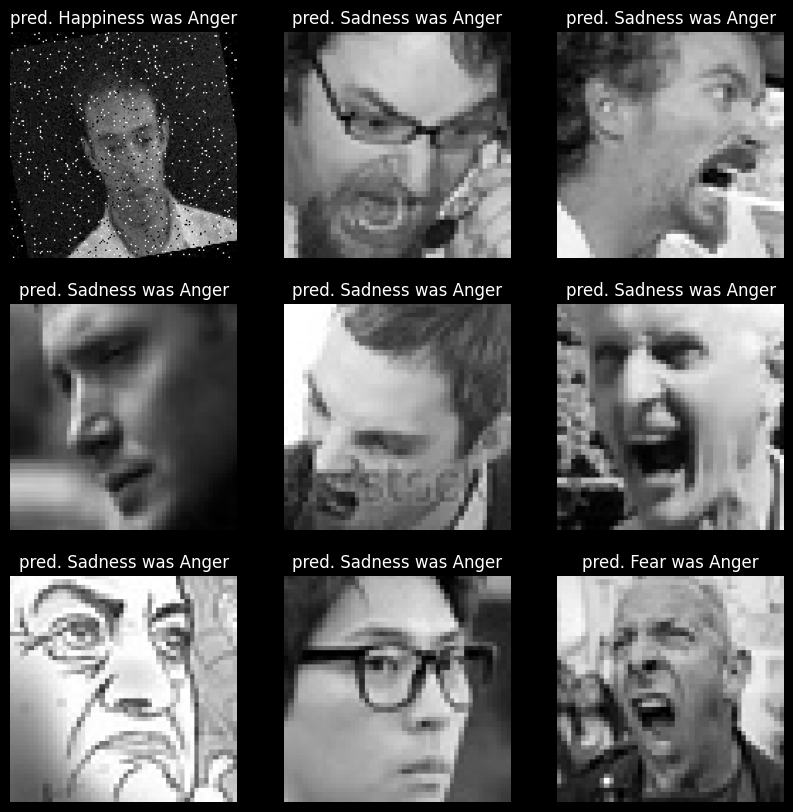

In [55]:
#Klassennamen
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise', 'neutral']

# Retrieve a batch of images from the test set
image_batch, label_batch = next(test_set)

predictions_in_percentage = model.predict_on_batch(image_batch)
predictions = np.argmax(predictions_in_percentage, axis=-1)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow((image_batch[i] * 255).astype("uint8"))
  plt.title('pred. '  + class_names[predictions[i]] + ' was ' + class_names[np.argmax(label_batch[i])])
  plt.axis("off")



## Summary

* **Using a pre-trained model for feature extraction**:  When working with a small dataset, it is a common practice to take advantage of features learned by a model trained on a larger dataset in the same domain. This is done by instantiating the pre-trained model and adding a fully-connected classifier on top. The pre-trained model is "frozen" and only the weights of the classifier get updated during training.
In this case, the convolutional base extracted all the features associated with each image and you just trained a classifier that determines the image class given that set of extracted features.

* **Fine-tuning a pre-trained model**: To further improve performance, one might want to repurpose the top-level layers of the pre-trained models to the new dataset via fine-tuning.
In this case, you tuned your weights such that your model learned high-level features specific to the dataset. This technique is usually recommended when the training dataset is large and very similar to the original dataset that the pre-trained model was trained on.

To learn more, visit the [Transfer learning guide](https://www.tensorflow.org/guide/keras/transfer_learning).

# Precision/Recall Trade-off

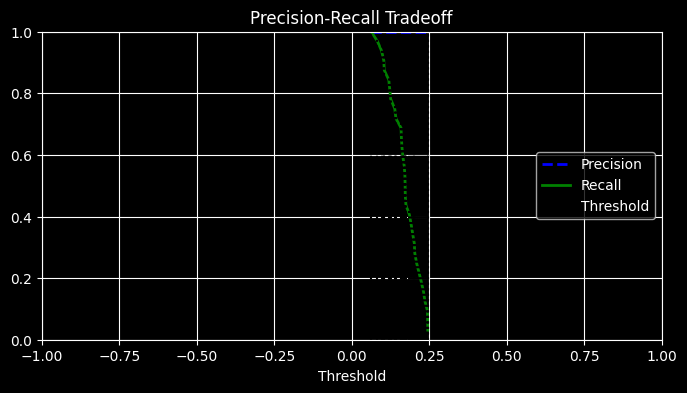

In [56]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Berechne Precision und Recall
precisions, recalls, thresholds = precision_recall_curve(label_batch[:, 0], predictions_in_percentage[:, 0])

# Plot Precision-Recall-Kurve
plt.figure(figsize=(8, 4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="Threshold")

# Setze Stil und Beschriftungen
plt.axis([-1, 1, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.title("Precision-Recall Tradeoff")

plt.show()


In [57]:
# Model abspeichern
# Speichern des Modells im Format Hierarchical Data Format Version 5
model.save('emotionmodell.h5')

In [ ]:
from sklearn.neural_network import MLPClassifier

# TODO train and validate the MLP model
mlp = MLPClassifier()

mlp.fit(train_datagen, training_set)  # Trainingsdaten und Zielvariablen übergeben
print("Training set score: %f" % mlp.score(train_datagen, training_set))
print("Test set score: %f" % mlp.score(test_datagen, test_set))

# Model abspeichern / Alternativversuch 
import pickle

# Modell in Datei speichern
model_filename = "emotion_modell.pkl"
with open(model_filename, mode="bw") as f:
    pickle.dump(mlp, file=f)

In [63]:
# Model später laden:
from tensorflow.keras.models import load_model

# Laden des Modells
loaded_model = load_model('emotionmodell.h5')

# Footer Info

In [64]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-06-25 01:52:25
Python Version: 3.9.16
-----------------------------------
